# **Investigating Mana Value Popularity**

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from tabulate import tabulate

# Read oracle-cards json to pandas dataframe
# oracle-cards json was downloaded here: https://scryfall.com/docs/api/bulk-data
oracle_cards = pd.read_json("oracle-cards-20241007090211.json")

In [2]:
# Display dataframe info
print(len(oracle_cards))
oracle_cards.head()

33220


,object,id,oracle_id,multiverse_ids,mtgo_id,mtgo_foil_id,tcgplayer_id,cardmarket_id,name,lang,...,watermark,card_faces,tcgplayer_etched_id,loyalty,life_modifier,hand_modifier,attraction_lights,color_indicator,content_warning,defense
0,card,86bf43b1-8d4e-4759-bb2d-0b2e03ba7012,0004ebd0-dfd6-4276-b4a6-de0003e94237,[15862],15870.0,15871.0,3094.0,3081.0,Static Orb,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,card,7050735c-b232-47a6-a342-01795bfd0d46,0006faf6-7a61-426c-9034-579f2cfcfa83,[370780],49283.0,49284.0,69965.0,262945.0,Sensory Deprivation,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,card,e718b21b-46d1-4844-985c-52745657b1ac,0007c283-5b7a-4c00-9ca1-b455c8dff8c3,[470580],77122.0,NaN,196536.0,391692.0,Road of Return,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,card,036ef8c9-72ac-46ce-af07-83b79d736538,000d5588-5a4c-434e-988d-396632ade42c,[83282],22609.0,22610.0,12835.0,12551.0,Storm Crow,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,card,6010d06b-33b6-4631-9b3f-192d8c6b96e7,000d8291-d6a8-436e-9e17-7531333686a8,[],NaN,NaN,NaN,NaN,Snarlfang Vermin,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
cards = []

# Filter cards into a list by certain criteria
for i, card in oracle_cards.iterrows():
    if (
        # Only cards legal in modern
        card["legalities"]["modern"] == "legal"
        # Only cards in english
        and card["lang"] == "en"
        # Only cards with a price to use
        and card["prices"]["usd"] != None
        # Only cards with a single face/single mana value
        and card["layout"] not in ['prototype', 'transform', 'modal_dfc', 'split', 'adventure']
        # Only cards without the rarity "special"
        and card["rarity"] != "special"
        # Only cards with a mana value less than 9
        and card["cmc"] <=8
        ):
        
        cards.append(card)

In [4]:
# Print number of cards left
print(len(cards))

18641


In [5]:
clean_cards = []
clean_dict = {}

# Clean cards by extracting only the fields we need
for card in cards:
    # Card id
    clean_dict["id"] = card["id"]
    # Card name
    clean_dict["name"] = card["name"]
    # Card mana value
    clean_dict["mana_value"] = card["cmc"]
    # Card rarity
    clean_dict["rarity"] = card["rarity"]
    # Card price (usd)
    clean_dict["usd"] = float(card["prices"]["usd"])
        
    clean_cards.append(clean_dict)
    clean_dict = {}

print(len(clean_cards))

18641


In [6]:
# Save cleaned cards to a pandas dataframe
cards_df = pd.DataFrame(clean_cards)

In [7]:
# Display cleaned table
cards_df.head()

,id,name,mana_value,rarity,usd
0,7050735c-b232-47a6-a342-01795bfd0d46,Sensory Deprivation,1.0,common,0.02
1,036ef8c9-72ac-46ce-af07-83b79d736538,Storm Crow,2.0,common,0.21
2,e0f83824-43c6-4101-88fd-9109958b23e2,Ravnica at War,4.0,rare,0.38
3,2cfd365e-34d1-4224-b925-119000311934,"Greta, Sweettooth Scourge",3.0,uncommon,0.13
4,0072bbbf-a695-47dd-9615-db2659f357db,Pteramander,1.0,uncommon,0.03


In [8]:
# Split table on the four rarities
common_cards = cards_df[cards_df["rarity"] == "common"]
uncommon_cards = cards_df[cards_df["rarity"] == "uncommon"]
rare_cards = cards_df[cards_df["rarity"] == "rare"]
mythic_cards = cards_df[cards_df["rarity"] == "mythic"]

Average Common Price 0.11568162810147757
+--------------+-----------+
|   mana_value |       usd |
|--------------+-----------|
|            0 | 0.183065  |
|            1 | 0.186915  |
|            2 | 0.136499  |
|            3 | 0.0933106 |
|            4 | 0.0723656 |
|            5 | 0.0730454 |
|            6 | 0.0606182 |
|            7 | 0.103692  |
|            8 | 0.065     |
+--------------+-----------+


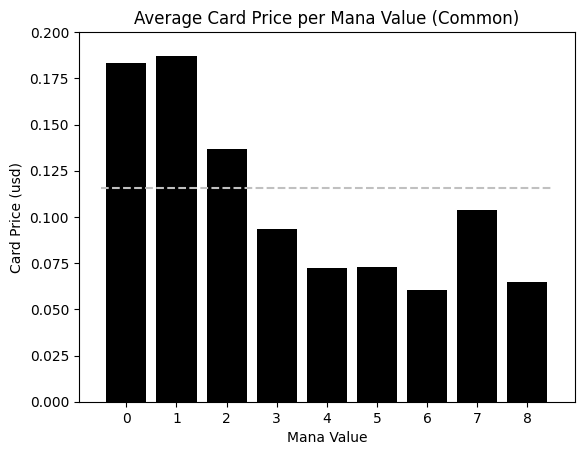

In [9]:
import matplotlib.pyplot as plt

# Calculate average common card price
average_common_price = common_cards["usd"].mean()
print("Average Common Price", average_common_price)

# Calculate average common card price per mana value
average_common_price_per_mana_value = common_cards.groupby("mana_value", as_index=False)["usd"].mean()
print(tabulate(average_common_price_per_mana_value, headers="keys", tablefmt="psql", showindex=False))

# Display data with thresholded bar chart
fig, ax = plt.subplots()
ax.bar(average_common_price_per_mana_value["mana_value"], average_common_price_per_mana_value["usd"], color="black")

# Threshold line at average common card price
ax.plot([-0.5, 8.5], [average_common_price, average_common_price], "--", color="silver")

# Set x and y axes ranges
ax.set_yticks(np.arange(0.0, 0.225, 0.025))
ax.set_xticks(range(9))

# Set table labels
ax.set_title("Average Card Price per Mana Value (Common)")
ax.set_xlabel("Mana Value")
ax.set_ylabel("Card Price (usd)")

plt.show()

In [10]:
import scipy.stats as stats

# Calculate correlation coefficient between mana value and card price for common cards
common_correlation_coefficient, common_p_value = stats.pearsonr(common_cards["usd"], common_cards["mana_value"])

# Display results
print(f"Correlation coefficient: {common_correlation_coefficient:.5f}")
print(f"P-value: {common_p_value:.5f}")

Correlation coefficient: -0.09788
P-value: 0.00000


Average Uncommon Price 0.2889452194624022
+--------------+----------+
|   mana_value |      usd |
|--------------+----------|
|            0 | 0.434754 |
|            1 | 0.435756 |
|            2 | 0.357613 |
|            3 | 0.296503 |
|            4 | 0.212264 |
|            5 | 0.156526 |
|            6 | 0.181646 |
|            7 | 0.137453 |
|            8 | 0.157917 |
+--------------+----------+


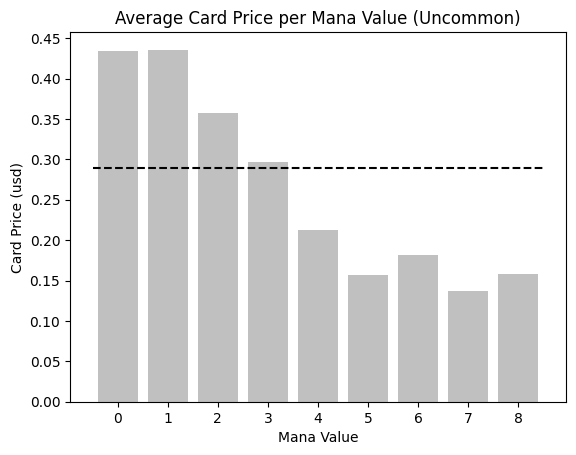

In [11]:
# Calculate average uncommon card price
average_uncommon_price = uncommon_cards["usd"].mean()
print("Average Uncommon Price", average_uncommon_price)

# Calculate average uncommon card price per mana value
average_uncommon_price_per_mana_value = uncommon_cards.groupby("mana_value", as_index=False)["usd"].mean()
print(tabulate(average_uncommon_price_per_mana_value, headers="keys", tablefmt="psql", showindex=False))

# Display data with thresholded bar chart
fig, ax = plt.subplots()
ax.bar(average_uncommon_price_per_mana_value["mana_value"], average_uncommon_price_per_mana_value["usd"], color="silver")

# Threshold line at average uncommon card price
ax.plot([-0.5, 8.5], [average_uncommon_price, average_uncommon_price], "k--")

# Set x and y axes ranges
ax.set_yticks(np.arange(0.0, 0.5, 0.05))
ax.set_xticks(range(9))

# Set table labels
ax.set_title("Average Card Price per Mana Value (Uncommon)")
ax.set_xlabel("Mana Value")
ax.set_ylabel("Card Price (usd)")

plt.show()

In [12]:
# Calculate correlation coefficient between mana value and card price for uncommon cards
uncommon_correlation_coefficient, uncommon_p_value = stats.pearsonr(uncommon_cards["usd"], uncommon_cards["mana_value"])

# Dispaly results
print(f"Correlation coefficient: {uncommon_correlation_coefficient:.5f}")
print(f"P-value: {uncommon_p_value:.5f}")

Correlation coefficient: -0.09955
P-value: 0.00000


Average Rare Price 1.7073843145774492
+--------------+---------+
|   mana_value |     usd |
|--------------+---------|
|            0 | 4.97772 |
|            1 | 2.26574 |
|            2 | 1.80607 |
|            3 | 1.38099 |
|            4 | 1.29734 |
|            5 | 1.2282  |
|            6 | 1.27117 |
|            7 | 1.3002  |
|            8 | 1.18096 |
+--------------+---------+


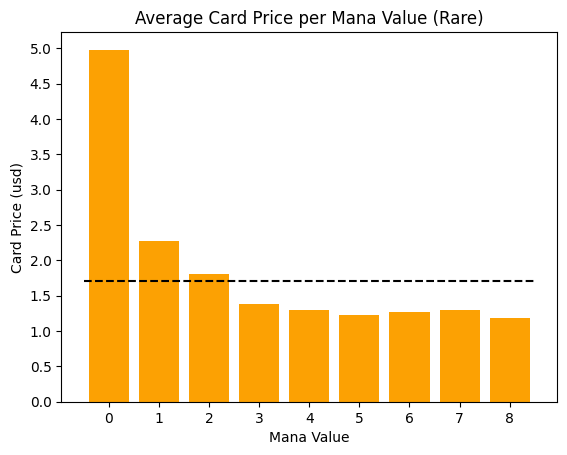

In [13]:
# Calculate average rare card price
average_rare_price = rare_cards["usd"].mean()
print("Average Rare Price", average_rare_price)

# Calculate average rare card price per mana value
average_rare_price_per_mana_value = rare_cards.groupby("mana_value", as_index=False)["usd"].mean()
print(tabulate(average_rare_price_per_mana_value, headers="keys", tablefmt="psql", showindex=False))

# Display data with thresholded bar chart
fig, ax = plt.subplots()
ax.bar(average_rare_price_per_mana_value["mana_value"], average_rare_price_per_mana_value["usd"], color="#fca103")

# Threshold line at average uncommon card price
ax.plot([-0.5, 8.5], [average_rare_price, average_rare_price], "k--")

# Set x and y axes ranges
ax.set_yticks(np.arange(0.0, 5.5, 0.5))
ax.set_xticks(range(9))

# Set table labels
ax.set_title("Average Card Price per Mana Value (Rare)")
ax.set_xlabel("Mana Value")
ax.set_ylabel("Card Price (usd)")

plt.show()

In [14]:
# Calculate correlation coefficient between mana value and card price for rare cards
rare_correlation_coefficient, rare_p_value = stats.pearsonr(rare_cards["usd"], rare_cards["mana_value"])

# Display results
print(f"Correlation coefficient: {rare_correlation_coefficient:.5f}")
print(f"P-value: {rare_p_value:.5f}")

Correlation coefficient: -0.16888
P-value: 0.00000


Average Mythic Price 5.11131845841785
+--------------+----------+
|   mana_value |      usd |
|--------------+----------|
|            0 | 15.4789  |
|            1 |  8.80467 |
|            2 |  5.75412 |
|            3 |  5.33234 |
|            4 |  4.81923 |
|            5 |  4.26422 |
|            6 |  3.55389 |
|            7 |  6.14493 |
|            8 |  7.37714 |
+--------------+----------+


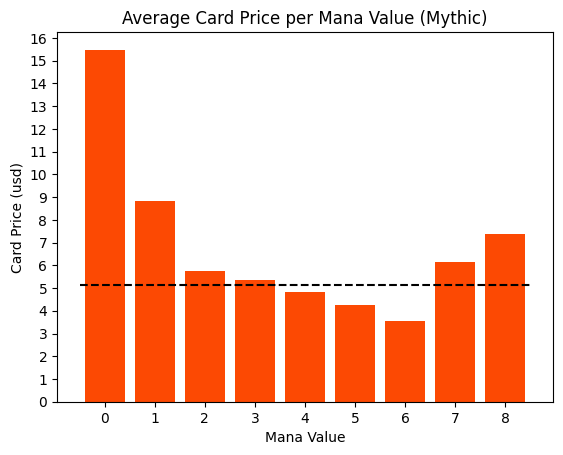

In [15]:
# Calculate average mythic card price
average_mythic_price = mythic_cards["usd"].mean()
print("Average Mythic Price", average_mythic_price)

# Calculate average mythic card price per mana value
average_mythic_price_per_mana_value = mythic_cards.groupby("mana_value", as_index=False)["usd"].mean()
print(tabulate(average_mythic_price_per_mana_value, headers="keys", tablefmt="psql", showindex=False))

# Display data with thresholded bar chart
fig, ax = plt.subplots()
ax.bar(average_mythic_price_per_mana_value["mana_value"], average_mythic_price_per_mana_value["usd"], color="#fc4903")

# Threshold line at average uncommon card price
ax.plot([-0.5, 8.5], [average_mythic_price, average_mythic_price], "k--")

# Set x and y axes ranges
ax.set_yticks(np.arange(0.0, 17.0, 1.0))
ax.set_xticks(range(9))

# Set table labels
ax.set_title("Average Card Price per Mana Value (Mythic)")
ax.set_xlabel("Mana Value")
ax.set_ylabel("Card Price (usd)")

plt.show()

In [16]:
# Calculate correlation coefficient between mana value and card price for mythic cards
mythic_correlation_coefficient, mythic_p_value = stats.pearsonr(mythic_cards["usd"], mythic_cards["mana_value"])

# Display results
print(f"Correlation coefficient: {mythic_correlation_coefficient:.5f}")
print(f"P-value: {mythic_p_value:.5f}")

Correlation coefficient: -0.08227
P-value: 0.00975


In [17]:
from scipy.stats import zscore

# Calculate price Z-scores for common cards
common_cards["zscore"] = zscore(common_cards["usd"])
# Find average common price Z-score for each mana value
common_zscore_per_mana_value = common_cards.groupby("mana_value", as_index=False)["zscore"].mean()

# Calculate price Z-scores for uncommon cards
uncommon_cards["zscore"] = zscore(uncommon_cards["usd"])
# Find average uncommon price Z-score for each mana value
uncommon_zscore_per_mana_value = uncommon_cards.groupby("mana_value", as_index=False)["zscore"].mean()

# Calculate price Z-scores for rare cards
rare_cards["zscore"] = zscore(rare_cards["usd"])
# Find average rare price Z-score for each mana value
rare_zscore_per_mana_value = rare_cards.groupby("mana_value", as_index=False)["zscore"].mean()

# Calculate price Z-scores for mythic cards
mythic_cards["zscore"] = zscore(mythic_cards["usd"])
# Find average mythic price Z-score for each mana value
mythic_zscore_per_mana_value = mythic_cards.groupby("mana_value", as_index=False)["zscore"].mean()

In [18]:
# Define empty dataframe with only the mana value column with values from 0 to 9
average_zscore_per_mana_value = pd.DataFrame({"mana_value": np.arange(0.0, 9.0, 1.0)})

# Calculate average Z-score per mana value across all rarities
zscore_averages = []
for i in np.arange(0.0, 9.0, 1.0):
    zscores = []

    # Append a mana value's Z-score to list for each rarity
    zscores.append(common_zscore_per_mana_value["zscore"][i])
    zscores.append(uncommon_zscore_per_mana_value["zscore"][i])
    zscores.append(rare_zscore_per_mana_value["zscore"][i])
    zscores.append(mythic_zscore_per_mana_value["zscore"][i])

    # Average the list and save it to another list 
    zscore_average = sum(zscores)/len(zscores)
    zscore_averages.append(zscore_average)
    
# Add total average Z-scores to a zscore column in the empty dataframe
average_zscore_per_mana_value["zscore"] = zscore_averages

# Display final table
average_zscore_per_mana_value.head(9)

,mana_value,zscore
0,0.0,0.603127
1,1.0,0.234431
2,2.0,0.058835
3,3.0,-0.026605
4,4.0,-0.085196
5,5.0,-0.121779
6,6.0,-0.141063
7,7.0,-0.046671
8,8.0,-0.036884
